# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


In [13]:
cities

['yellowknife',
 'arno',
 'bethel',
 'saint-pierre',
 'eureka',
 'tungi',
 'guiglo',
 'prabumulih',
 'margaret river',
 'waitangi',
 'ust-nera',
 'udachny',
 'berezovyy',
 'port arthur',
 'albany',
 'san juan',
 'chibougamau',
 'vado ligure',
 'grytviken',
 'adamstown',
 'namdrik',
 'nieuw amsterdam',
 'invercargill',
 'hermanus',
 'fale old settlement',
 'kingston',
 'lihue',
 'port-aux-francais',
 'punta arenas',
 'iqaluit',
 'cabo san lucas',
 'ulsteinvik',
 'longyearbyen',
 'georgetown',
 'blackmans bay',
 'tanumah',
 'praia da vitoria',
 "arkhangel'sk",
 'tercan',
 'port alfred',
 'yershov',
 'lionel town',
 'papatowai',
 'quatre cocos',
 'kristiansund',
 'fada',
 'taroudant',
 'mashi',
 'asind',
 'middlesboro',
 'taiohae',
 'lebu',
 'castillos',
 'mazagao',
 'edinburgh of the seven seas',
 'keflavik',
 'happy valley-goose bay',
 'kilifi',
 'kavaratti',
 'port elizabeth',
 "nuku'alofa",
 'bethanie',
 'port mathurin',
 'mossel bay',
 'novyy urgal',
 'sitka',
 'talnakh',
 'brisas de

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | arno
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | saint-pierre
Processing Record 5 of Set 1 | eureka
Processing Record 6 of Set 1 | tungi
Processing Record 7 of Set 1 | guiglo
Processing Record 8 of Set 1 | prabumulih
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | ust-nera
Processing Record 12 of Set 1 | udachny
Processing Record 13 of Set 1 | berezovyy
Processing Record 14 of Set 1 | port arthur
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | san juan
Processing Record 17 of Set 1 | chibougamau
Processing Record 18 of Set 1 | vado ligure
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | namdrik
Processing Record 22 of Set 1 | nieuw amsterdam
Processing Record 23 of Set 1 

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,14.12,67,20,6.71,CA,1717471880
1,arno,60.1167,18.6333,13.77,62,9,4.73,SE,1717472049
2,bethel,41.3712,-73.4140,20.64,78,0,0.00,US,1717472049
3,saint-pierre,-21.3393,55.4781,18.82,68,0,2.06,RE,1717472049
4,eureka,40.8021,-124.1637,15.67,80,100,1.79,US,1717471870


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("cities_output_data.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("cities_output_data.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,14.12,67,20,6.71,CA,1717471880
1,arno,60.1167,18.6333,13.77,62,9,4.73,SE,1717472049
2,bethel,41.3712,-73.4140,20.64,78,0,0.00,US,1717472049
3,saint-pierre,-21.3393,55.4781,18.82,68,0,2.06,RE,1717472049
4,eureka,40.8021,-124.1637,15.67,80,100,1.79,US,1717471870


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

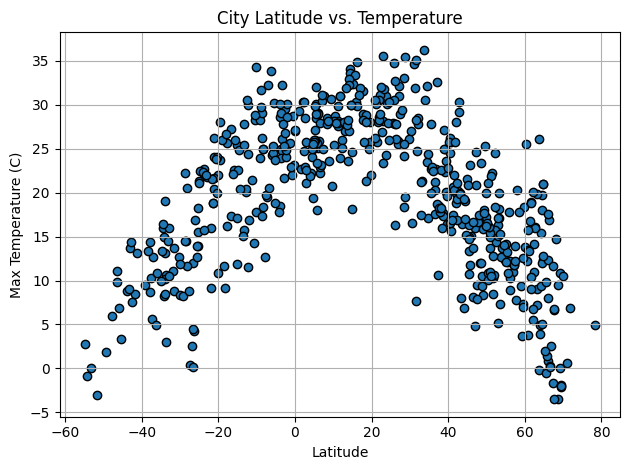

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature")
plt.tight_layout()

# Save the figure
plt.savefig("latvstemp_fig.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

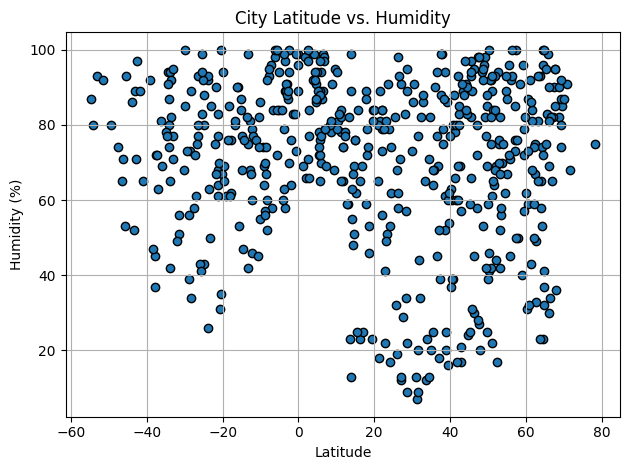

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity")
plt.tight_layout()

# Save the figure
plt.savefig("latvshumidity_fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

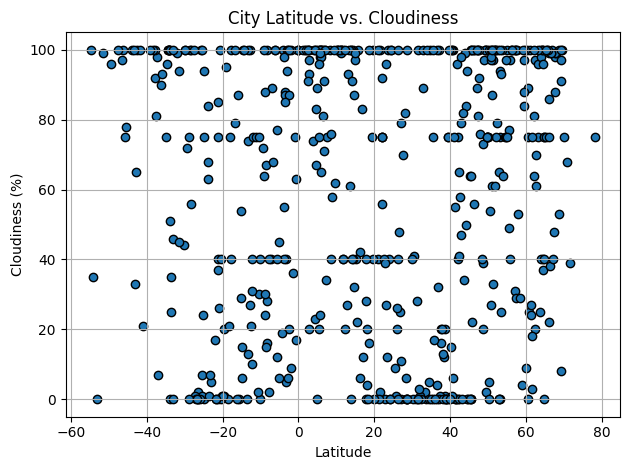

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o',edgecolors='black')


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness")
plt.tight_layout()

# Save the figure
plt.savefig("latvscloudiness_fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

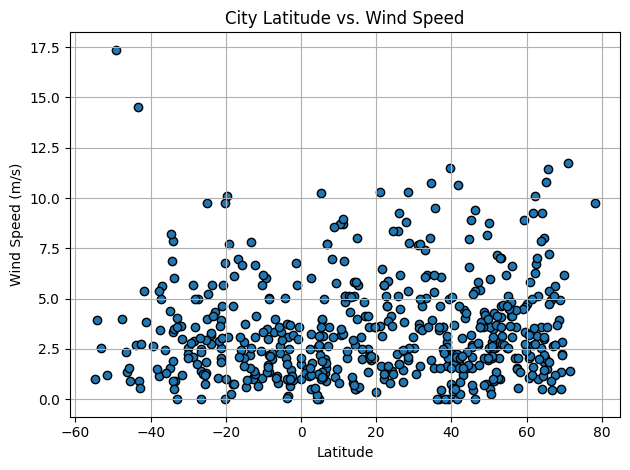

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed")
plt.tight_layout()

# Save the figure
plt.savefig("latvswind_fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,14.12,67,20,6.71,CA,1717471880
1,arno,60.1167,18.6333,13.77,62,9,4.73,SE,1717472049
2,bethel,41.3712,-73.4140,20.64,78,0,0.00,US,1717472049
4,eureka,40.8021,-124.1637,15.67,80,100,1.79,US,1717471870
5,tungi,23.8900,90.4058,31.00,79,40,4.12,BD,1717472050


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,saint-pierre,-21.3393,55.4781,18.82,68,0,2.06,RE,1717472049
7,prabumulih,-3.4500,104.2500,32.25,58,88,0.18,ID,1717472050
8,margaret river,-33.9500,115.0667,19.07,65,51,3.36,AU,1717472051
9,waitangi,-43.9535,-176.5597,8.79,86,100,2.68,NZ,1717472051
15,san juan,-31.5375,-68.5364,8.79,51,94,1.22,AR,1717472052


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.594230326823679


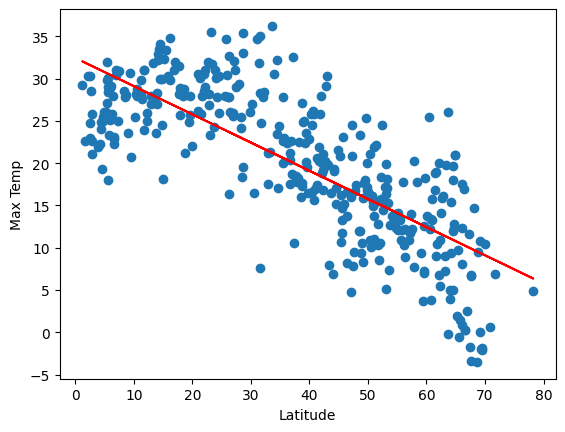

In [28]:
# Linear regression on Northern Hemisphere
x = (northern_hemi_df['Lat'])
y = (northern_hemi_df['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x , y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5,-30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.6099762769301503


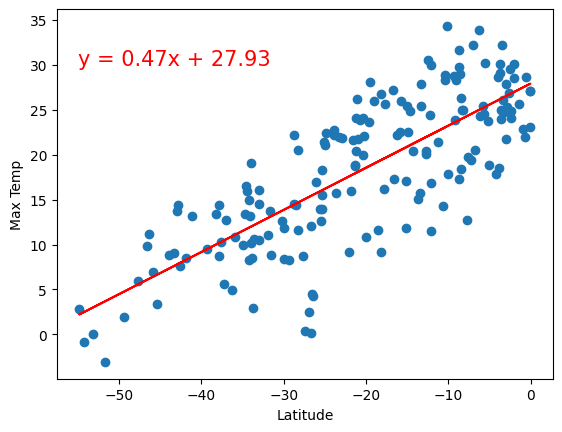

In [29]:
# Linear regression on Southern Hemisphere
x = (southern_hemi_df['Lat'])
y = (southern_hemi_df['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x , y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0020126525976403454


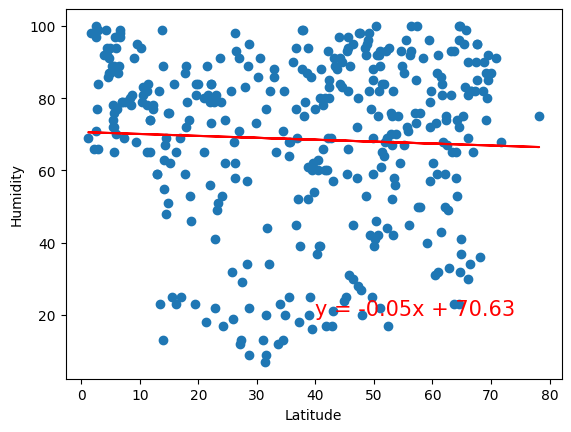

In [30]:
# Northern Hemisphere
x = (northern_hemi_df['Lat'])
y = (northern_hemi_df['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x , y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.015753631695518657


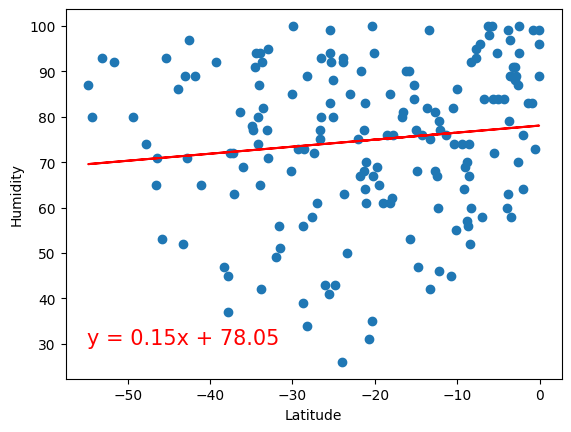

In [31]:
# Southern Hemisphere
x = (southern_hemi_df['Lat'])
y = (southern_hemi_df['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x , y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0008321362476128317


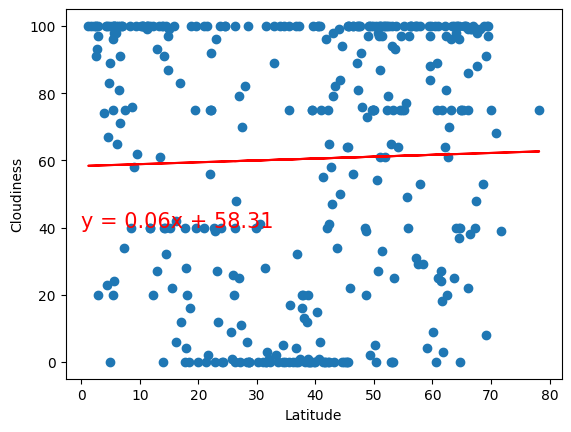

In [33]:
# Northern Hemisphere
x = (northern_hemi_df['Lat'])
y = (northern_hemi_df['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x , y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.021364040860594416


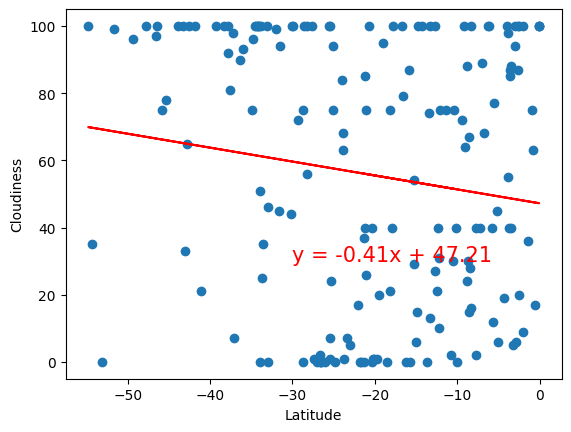

In [34]:
# Southern Hemisphere
x = (southern_hemi_df['Lat'])
y = (southern_hemi_df['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x , y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004609476608800795


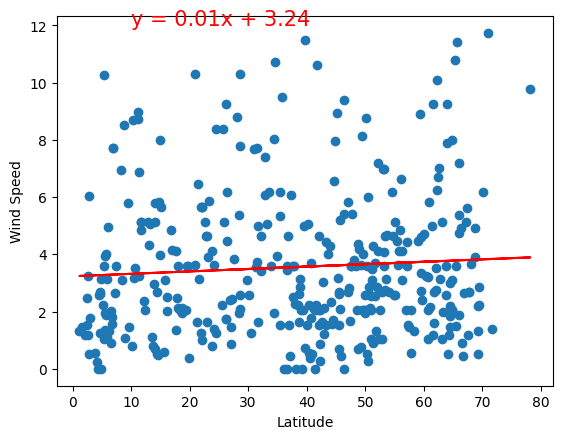

In [35]:
# Northern Hemisphere
x = (northern_hemi_df['Lat'])
y = (northern_hemi_df['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x , y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.025718638892782662


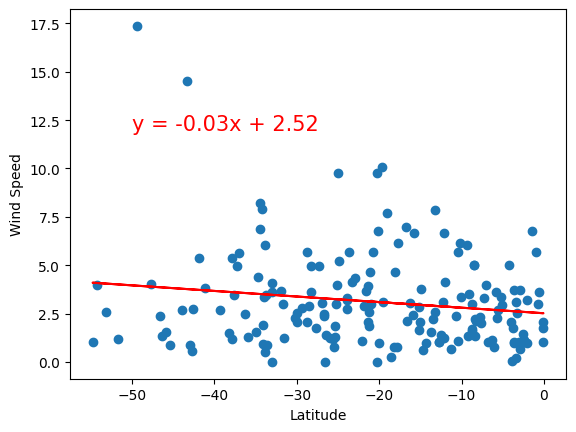

In [36]:
# Southern Hemisphere
x = (southern_hemi_df['Lat'])
y = (southern_hemi_df['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x , y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE